## Python statistics essential training - 03_03_histograms


Standard imports


In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv("income-1965-china.csv")
china2015 = pd.read_csv("income-2015-china.csv")
usa1965 = pd.read_csv("income-1965-usa.csv")
usa2015 = pd.read_csv("income-2015-usa.csv")

<Axes: >

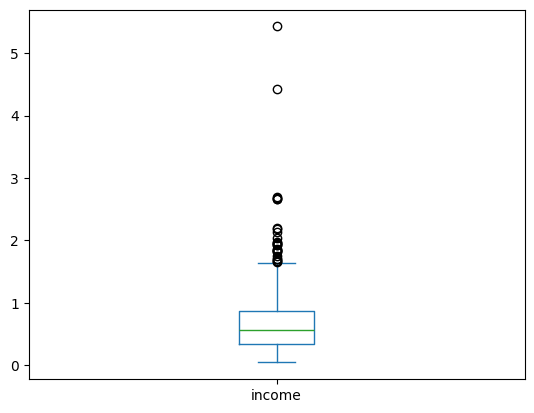

In [5]:
china1965.income.plot(kind="box")

<Axes: >

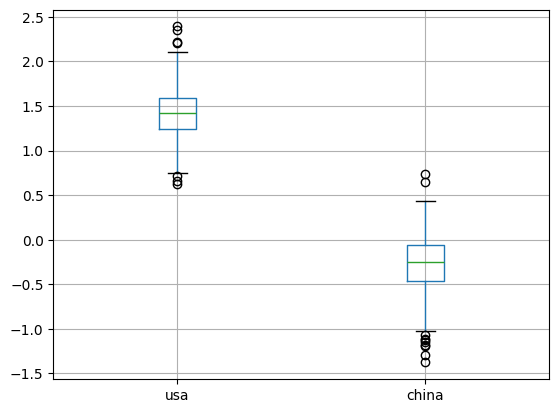

In [6]:
pd.DataFrame({'usa': usa1965.log10_income,
             'china': china1965.log10_income}).boxplot()

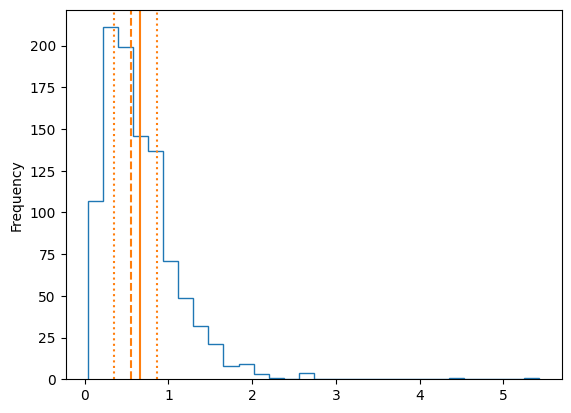

In [7]:
china1965.income.plot(kind='hist', histtype='step', bins=30)

pp.axvline(china1965.income.mean(), c='C1')
pp.axvline(china1965.income.median(), c='C1', linestyle='--')
pp.axvline(china1965.income.quantile(0.25), c='C1', linestyle=':')
pp.axvline(china1965.income.quantile(0.75), c='C1', linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944063)

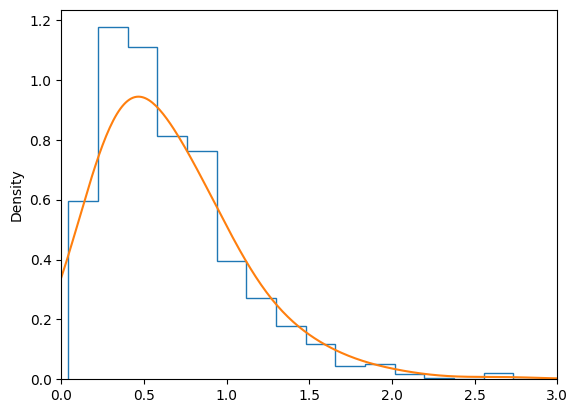

In [8]:
china1965.income.plot(kind='hist', histtype='step', bins=30, density=True)
china1965.income.plot.density(bw_method=0.5)

pp.axis(xmin=0, xmax=3)

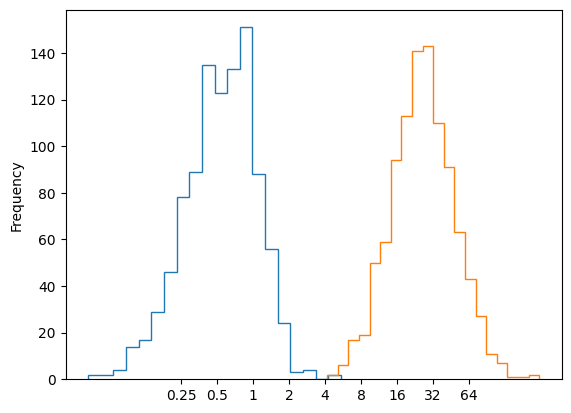

In [9]:
china1965.log10_income.plot.hist(histtype='step', bins=20)
usa1965.log10_income.plot.hist(histtype='step', bins=20)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

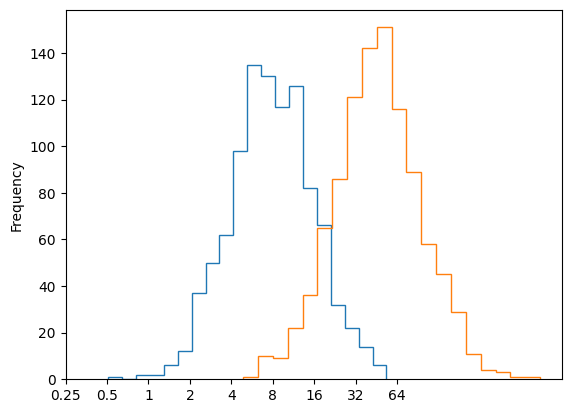

In [10]:
china2015.log10_income.plot.hist(histtype='step', bins=20)
usa2015.log10_income.plot.hist(histtype='step', bins=20)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

In [11]:
gapminder = pd.read_csv("gapminder.csv")

In [14]:
china_pop_2015 = float(
    (gapminder.query('country == "China" and year == 2015').population.iloc[0]))
usa_pop_2015 = float((gapminder.query(
    'country == "United States" and year == 2015').population.iloc[0]))

china_pop_2015, usa_pop_2015

(1376048943.0, 321773631.0)

In [15]:
china2015["weight"] = china_pop_2015 / len(china2015)
usa2015["weight"] = usa_pop_2015 / len(usa2015)

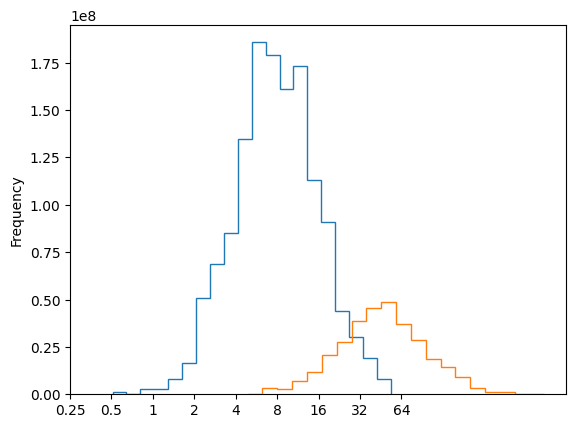

In [16]:
china2015.log10_income.plot.hist(
    histtype='step', bins=20, weights=china2015.weight)
usa2015.log10_income.plot.hist(
    histtype='step', bins=20, weights=usa2015.weight)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)